In [125]:
#load up modules

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

<center><font size="+2">Importing and inspecting the data</font></center>

In [165]:
#import data from csv into DF

train = pd.read_csv('train.csv', index_col='Id')
test = pd.read_csv('test.csv', index_col='Id')
test_for_sub = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
#inspecting the data

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026665458C10>,
      dtype=object)

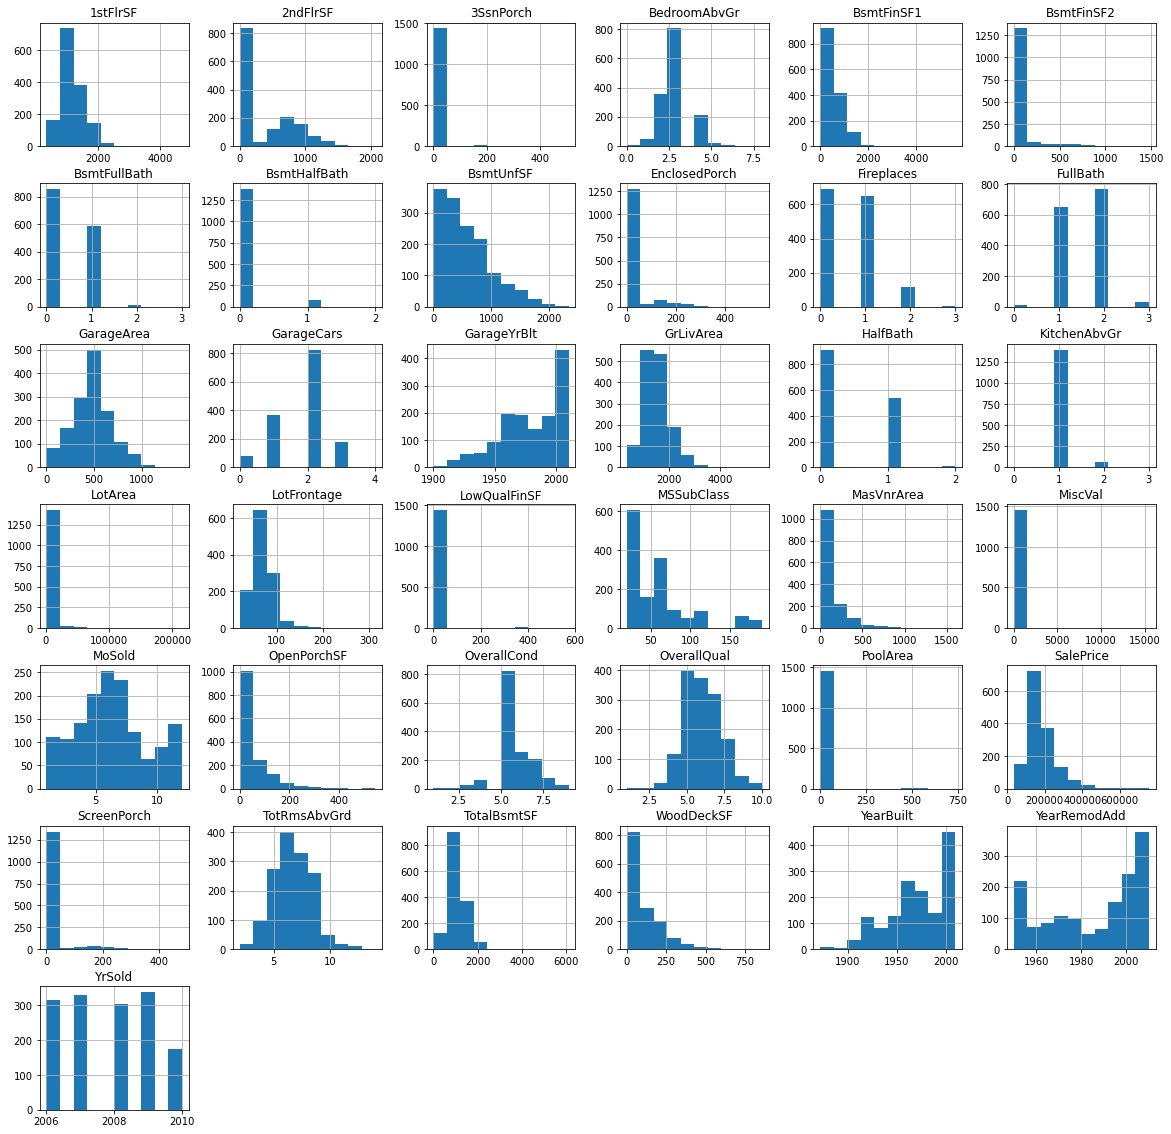

In [6]:
train.hist(figsize = (20,20))

<center><font size="+2">Preparing data</font></center>

In [50]:
#isolating categorical data

train_cat = train.select_dtypes(include = "object")
train_no_cat = train.select_dtypes(exclude = "object")

In [51]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [52]:
#filling in null values with O for encoding

train_cat.fillna(value="O", inplace=True)

Z:\Python\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [53]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   object
 18  ExterQual      1460 non-null

In [54]:
train_no_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [110]:
train_no_cat.fillna(value=0, inplace=True)

Z:\Python\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [111]:
#identifying variables that have the highest correlation with SalePrice

corr_mat = train_no_cat.corr()['SalePrice'].sort_values()

In [112]:
#dropping columns with correlation -0.3 < x < 0.3

corr_df = pd.DataFrame(corr_mat)

In [113]:
corr_df.reset_index(inplace=True)

In [114]:
drop_columns = corr_df[corr_df['SalePrice'] < 0.3]
drop_columns = drop_columns[drop_columns['SalePrice'] > -0.3]

In [115]:
drop_columns = drop_columns['index']
drop_columns = drop_columns.tolist()

In [116]:
train_prep = train_no_cat.drop(columns = drop_columns, axis=1)
train_prep

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,,,,,,,,,,,,,,,,,
1,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2,548,0,61,208500
2,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,2,460,298,0,181500
3,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2,608,0,42,223500
4,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,3,642,0,35,140000
5,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,3,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,6,1999,2000,0.0,0,953,953,694,1647,2,7,1,2,460,0,40,175000
1457,6,1978,1988,119.0,790,1542,2073,0,2073,2,7,2,2,500,349,0,210000
1458,7,1941,2006,0.0,275,1152,1188,1152,2340,2,9,2,1,252,0,60,266500


In [117]:
#encoding categorical data

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train_cat)

hot_matrix_train = enc.transform(train_cat).toarray()
hot_cat_train = pd.DataFrame(hot_matrix_train, columns=enc.get_feature_names())


OneHotEncoder(handle_unknown='ignore')

In [118]:
train_prep.reset_index(drop=True, inplace=True)
hot_cat_train.reset_index(drop=True, inplace=True)
hot_train = pd.concat([hot_cat_train,train_prep], axis=1) 

In [119]:
hot_cat_train

,x0_C (all),x0_FV,x0_RH,x0_RL,x0_RM,x1_Grvl,x1_Pave,x2_Grvl,x2_O,x2_Pave,...,x41_ConLw,x41_New,x41_Oth,x41_WD,x42_Abnorml,x42_AdjLand,x42_Alloca,x42_Family,x42_Normal,x42_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [120]:
hot_train

,x0_C (all),x0_FV,x0_RH,x0_RL,x0_RM,x1_Grvl,x1_Pave,x2_Grvl,x2_O,x2_Pave,...,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,854,1710,2,8,0,2,548,0,61,208500
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,1262,2,6,1,2,460,298,0,181500
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,866,1786,2,6,1,2,608,0,42,223500
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,756,1717,1,7,1,3,642,0,35,140000
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1053,2198,2,9,1,3,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,694,1647,2,7,1,2,460,0,40,175000
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,2073,2,7,2,2,500,349,0,210000
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1152,2340,2,9,2,1,252,0,60,266500
1458,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,1078,1,5,0,1,240,366,0,142125


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026666F64970>]],
      dtype=object)

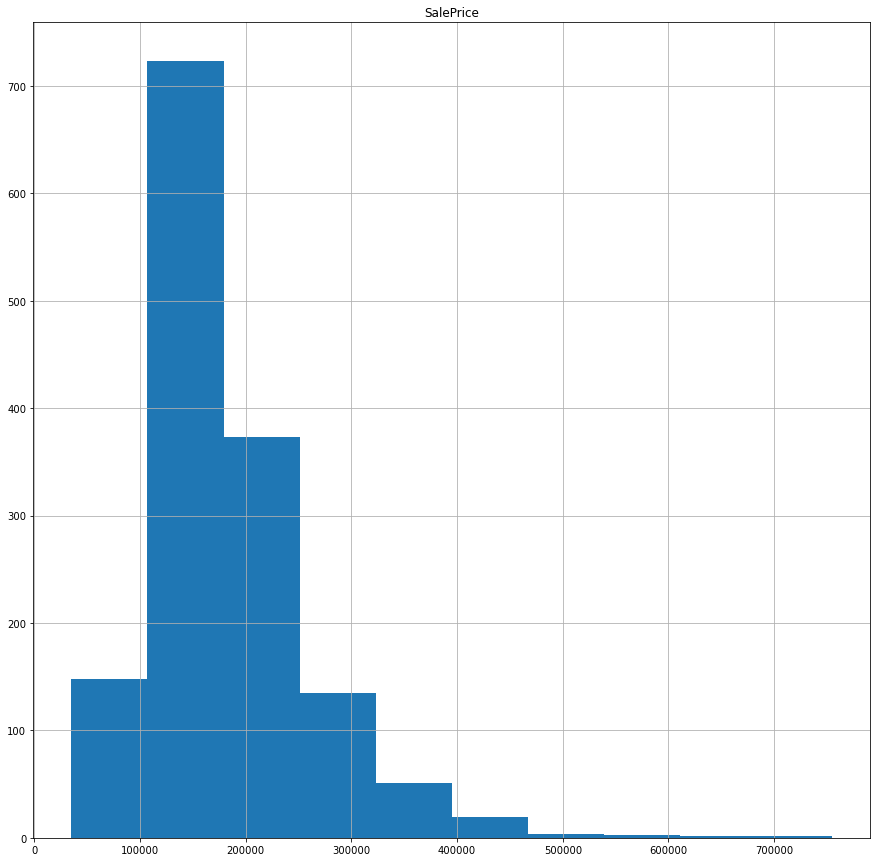

In [121]:
#looking at the distribution of SalePrice individually

hot_train.hist(column = 'SalePrice', figsize = (15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026668E612B0>]],
      dtype=object)

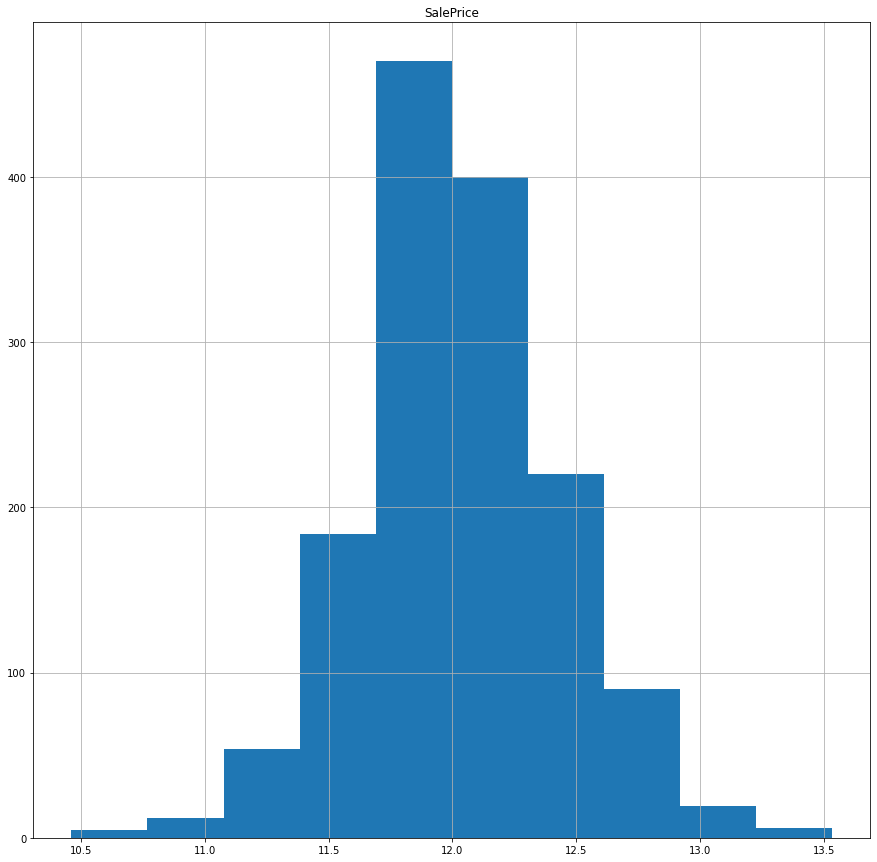

In [122]:
#looking at distribution after log transformation

hot_train_ready = hot_train
hot_train_ready['SalePrice'] = np.log1p(hot_train['SalePrice'])
hot_train_ready.hist(column = 'SalePrice', figsize = (15,15))

In [ ]:
#The data now appears normally distributed, we will move on to fitting models and evaluating

<center><font size="+2">Fitting the model</font></center>

In [123]:
y = hot_train_ready['SalePrice']
x = hot_train_ready.drop(columns = 'SalePrice')

In [124]:
lasso = Lasso()
ridge = Ridge()
elastic_net = ElasticNet()
forest = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16)

lasso.fit(x,y)
ridge.fit(x,y)
elastic_net.fit(x,y)
forest.fit(x,y)

Lasso()

Ridge()

ElasticNet()

RandomForestRegressor(max_leaf_nodes=16, n_estimators=500)

In [126]:
lasso_pred = lasso.predict(x)
ridge_pred = ridge.predict(x)
elastic_net_pred = elastic_net.predict(x)
forest_pred = forest.predict(x)

lasso_rmsle = mean_squared_log_error(y, lasso_pred)
ridge_rmsle = mean_squared_log_error(y, ridge_pred)
elastic_net_rmsle = mean_squared_log_error(y, elastic_net_pred)
forest_rmsle = mean_squared_log_error(y, forest_pred)

In [127]:
lasso_rmsle
ridge_rmsle
elastic_net_rmsle
forest_rmsle

0.00021919269545477046

6.844607128789136e-05

0.00020705735586917963

0.00013914194459943837

In [128]:
def display_scores(scores):
    print("Scores:", -scores)
    print("Mean:", -scores.mean())
    print("Standard deviation:", scores.std())

In [129]:
#CV evaluation of the four models

#Lasso
scores_lasso = cross_val_score(lasso, x, y, scoring="neg_root_mean_squared_error", cv=10)
display_scores(scores_lasso)

Scores: [0.16920426 0.16025943 0.17413247 0.2311275  0.19852588 0.15410816
 0.18820307 0.17372925 0.33833366 0.17115395]
Mean: 0.19587776238456475
Standard deviation: 0.051866811000899085


In [130]:
scores_ridge = cross_val_score(ridge, x, y, scoring="neg_root_mean_squared_error", cv=10)
display_scores(scores_ridge)

Scores: [0.12798638 0.11358061 0.13000172 0.18055572 0.15307994 0.13222932
 0.12623204 0.11268021 0.24024418 0.14600745]
Mean: 0.14625975724061238
Standard deviation: 0.0366709402684703


In [132]:
scores_elastic = cross_val_score(elastic_net, x, y, scoring="neg_root_mean_squared_error", cv=10)
display_scores(scores_elastic)

Scores: [0.16481839 0.15896847 0.16750867 0.22940549 0.18823087 0.14732237
 0.18071735 0.16765037 0.33031539 0.16765117]
Mean: 0.19025885328086384
Standard deviation: 0.05123779390496719


In [134]:
scores_forest = cross_val_score(forest, x, y, scoring="neg_root_mean_squared_error", cv=10)
display_scores(scores_forest)

Scores: [0.17878278 0.15520811 0.16995742 0.18724859 0.20720026 0.14477945
 0.16611411 0.1544152  0.17466735 0.18046607]
Mean: 0.17188393503970806
Standard deviation: 0.01722557645488325


In [139]:
#looking at most important features of forests

feature = list(x.columns)
importance = forest.feature_importances_

In [147]:
forest_importance = []

for name, score in zip(x.columns, forest.feature_importances_):
    forest_importance = forest_importance + [[name, score]]

In [149]:
forest_importance = pd.DataFrame(forest_importance, columns = ("Feature","Score"))

In [156]:
forest_importance.sort_values(by = "Score", ascending=False)

,Feature,Score
268,OverallQual,0.674962
276,GrLivArea,0.111933
280,GarageCars,0.048579
273,TotalBsmtSF,0.040608
281,GarageArea,0.023298
...,...,...
132,x17_Stone,0.000000
137,x19_Ex,0.000000
33,x8_CollgCr,0.000000
139,x19_Gd,0.000000


<center><font size="+2">Transforming test set and exporting model results to CSV</font></center>

In [158]:
test_cat = test.select_dtypes(include = "object")
test_no_cat = test.select_dtypes(exclude = "object")

#filling in null values with O for encoding

test_cat.fillna(value="O", inplace=True)
test_no_cat.fillna(value=0, inplace=True)

test_prep = test_no_cat.drop(columns = drop_columns, axis=1)

hot_matrix_test = enc.transform(test_cat).toarray()
hot_cat_test = pd.DataFrame(hot_matrix_test, columns=enc.get_feature_names())

test_prep.reset_index(drop=True, inplace=True)
hot_cat_test.reset_index(drop=True, inplace=True)
hot_test = pd.concat([hot_cat_test,test_prep], axis=1) 

Z:\Python\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [160]:
test_lasso = lasso.predict(hot_test)
test_ridge = ridge.predict(hot_test)
test_elastic = elastic_net.predict(hot_test)
test_forest = forest.predict(hot_test)

In [174]:
#putting predictions into a dataframe and converting predictions out of log form

df_lasso = pd.DataFrame({
        'id':test_for_sub['Id'],
        'SalePrice':np.expm1(test_lasso)
         })

df_ridge = pd.DataFrame({
        'id':test_for_sub['Id'],
        'SalePrice':np.expm1(test_ridge)
         })

df_elastic = pd.DataFrame({
        'id':test_for_sub['Id'],
        'SalePrice':np.expm1(test_elastic)
         })

df_forest = pd.DataFrame({
        'id':test_for_sub['Id'],
        'SalePrice':np.expm1(test_forest)
         })

In [176]:
df_lasso.to_csv('lasso_housing.csv', index=False)
df_ridge.to_csv('ridge_housing.csv', index=False)
df_elastic.to_csv('elastic_housing.csv', index=False)
df_forest.to_csv('forest_housing.csv', index=False)